# Route_Land Use polygons analysis

This code allows you to estimate the proportion of each category of land use contained within a 100m buffer along the route. All the polygons related to each route are assumed to be previously estimated. These are found in the Shapes folder: Shapes/Routes_LU100 

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import math

print ("it works")

it works


### Example for only one route 

In [3]:
route = 1408
db = gpd.read_file('../Shapes/Routes_LU100/R' +"%s" % (route) +'_route_LU100.shp')
print (db.crs)
db.head()

{'init': 'epsg:3116'}


,shapelen,objectid,subcategor,cod_subcat,shapearea,cod_cat_us,areagralus,objectid_1,Epub,Eqpto,Hmix,Mmix,Lmix,A_Epub,A_Eqpto,A_Hmix,A_Mmix,A_Lmix,geometry
0,297.888968,3149.0,?reas predominantemente residenciales,11.0,4737.936212,1.0,?reas de baja mixtura,3149.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,4737.936212,"POLYGON ((832074.2415231207 1182338.131761393,..."
1,163.057639,15803.0,Centralidades y corredores con alta mixtura,32.0,1101.735114,3.0,?reas y corredores de alta mixtura,15803.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1101.735114,0.000000,0.000000,"POLYGON ((831883.8388668993 1182073.495433122,..."
2,91.542632,24202.0,None,60.0,483.877147,6.0,Uso Dotacional,24202.0,0.0,1.0,0.0,0.0,0.0,0.0,483.877147,0.000000,0.000000,0.000000,"POLYGON ((832303.6178271207 1182294.002287754,..."
3,158.911601,11846.0,Zonas de Transici?n; Centralidades dotacionale...,21.0,1477.986446,2.0,?reas y corredores de media mixtura,11846.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1477.986446,0.000000,"POLYGON ((831806.5771726859 1182094.874284659,..."
4,200.324259,3041.0,?reas predominantemente residenciales,11.0,2463.062471,1.0,?reas de baja mixtura,3041.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,2463.062471,"POLYGON ((831798.2058038998 1182129.317343757,..."


In [4]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 19 columns):
shapelen      18 non-null float64
objectid      18 non-null float64
subcategor    14 non-null object
cod_subcat    18 non-null float64
shapearea     18 non-null float64
cod_cat_us    18 non-null float64
areagralus    18 non-null object
objectid_1    18 non-null float64
Epub          18 non-null float64
Eqpto         18 non-null float64
Hmix          18 non-null float64
Mmix          18 non-null float64
Lmix          18 non-null float64
A_Epub        18 non-null float64
A_Eqpto       18 non-null float64
A_Hmix        18 non-null float64
A_Mmix        18 non-null float64
A_Lmix        18 non-null float64
geometry      18 non-null object
dtypes: float64(16), object(3)
memory usage: 2.8+ KB


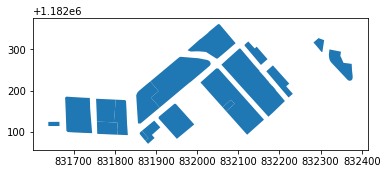

In [5]:
db.plot()

In [6]:
LU_Ep = (db['A_Epub']).sum()
LU_Eqpto = (db['A_Eqpto']).sum()
LU_Hmix = (db['A_Hmix']).sum()
LU_Mmix = (db['A_Mmix']).sum()
LU_Lmix = (db['A_Lmix']).sum()
ALU = LU_Ep + LU_Eqpto + LU_Hmix + LU_Mmix + LU_Lmix

In [7]:
print (LU_Ep)
print (LU_Eqpto)
print (LU_Hmix)
print (LU_Mmix)
print (LU_Lmix)
print (ALU)

0.0
1337.628500225
9054.291175800001
1477.98644562
46439.84418911
58309.750310755


In [8]:
pLU_Ep = LU_Ep / ALU
pLU_Eqpto = LU_Eqpto / ALU
pLU_Hmix = LU_Hmix / ALU
pLU_Mmix = LU_Mmix / ALU
pLU_Lmix = LU_Lmix / ALU

In [9]:
print (pLU_Ep) 
print (pLU_Eqpto)
print (pLU_Hmix) 
print (pLU_Mmix)
print (pLU_Lmix)

0.0
0.022940048501258626
0.15527919649023045
0.02534715785513133
0.7964335971533797


In [10]:
results = pd.DataFrame ({
        "route": [str(route)],
        "pLU_Ep" : [str(pLU_Ep)],
        "pLU_Eqpto" : [str(pLU_Eqpto)],
        "pLU_Hmix" : [str(pLU_Hmix)],
        "pLU_Mmix" : [str(pLU_Mmix)],
        "pLU_Lmix" : [str(pLU_Lmix)]})
print (results)

  route pLU_Ep             pLU_Eqpto             pLU_Hmix  \
0  1408    0.0  0.022940048501258626  0.15527919649023045   

              pLU_Mmix            pLU_Lmix  
0  0.02534715785513133  0.7964335971533797  


## Route's Land Use Polygons analysis for All routes 

The code requires the list of all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [11]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

In [17]:
for i in routes:
    
    db = gpd.read_file('../Shapes/Routes_LU100/R' +"%s" % (i) +'_route_LU100.shp')
    LU_Ep = (db['A_Epub']).sum()
    LU_Eqpto = (db['A_Eqpto']).sum()
    LU_Hmix = (db['A_Hmix']).sum()
    LU_Mmix = (db['A_Mmix']).sum()
    LU_Lmix = (db['A_Lmix']).sum()
    ALU = LU_Ep + LU_Eqpto + LU_Hmix + LU_Mmix + LU_Lmix    
    pLU_Ep = LU_Ep / ALU
    pLU_Eqpto = LU_Eqpto / ALU
    pLU_Hmix = LU_Hmix / ALU
    pLU_Mmix = LU_Mmix / ALU
    pLU_Lmix = LU_Lmix / ALU
    results = pd.DataFrame ({
        "route": [str(i)],
        "pLU_Ep" : [str(pLU_Ep)],
        "pLU_Eqpto" : [str(pLU_Eqpto)],
        "pLU_Hmix" : [str(pLU_Hmix)],
        "pLU_Mmix" : [str(pLU_Mmix)],
        "pLU_Lmix" : [str(pLU_Lmix)],
        "r_entropy": [r_entropy]})
    results.to_csv('../Tables/OUT/Routes_LU100_index/R' +"%s" %(i)+'_route_LU100.txt',index=False, header=True)

## Routes' Land Use Polygons analysis  Repport 

This part of the code summarizes the Routes' Land Use Polygons analysis in only one table. Please copy it to a text file and save. 

In [33]:
print ('route,r_pLU_Ep,r_pLU_Eqpto,r_pLU_Hmix,r_pLU_Mmix,r_pLU_Lmix')
for i in routes:
    df=np.loadtxt('../Tables/OUT/R' +"%s" %(i)+'_route_LU100.txt', delimiter=',',skiprows=1)
    print ((str(i)),(df[1]),(df[2]),(df[3]),(df[4]),(df[5]))

ruta,r_pLU_Ep,r_pLU_Eqpto,r_pLU_Hmix,r_pLU_Mmix,r_pLU_Lmix,r_entropy
('1002', 0.193174068541, 0.31326951697900002, 0.050068301425200003, 0.052389329362799997, 0.39109878369200002, 0.84054337564899995)
('1006', 0.076820749315499995, 0.069798578101600006, 0.75780804990799999, 0.0490993817395, 0.046473240935799999, 0.54908506710000005)
('1009', 0.15515207623899999, 0.14817355420299999, 0.56051180664900002, 0.0145276177098, 0.12163494519900001, 0.75444512630000005)
('1013', 0.083480195590799999, 0.14944362552500001, 0.27258417060399998, 0.122279222132, 0.37221278614800002, 0.91366421945300003)
('10291', 0.264803547438, 0.28047315961800001, 0.44756051379299999, 0.0071627791516000001, 0.0, 0.79608683982399997)
('10292', 0.227203069999, 0.033203989527400002, 0.30974044358899999, 0.0, 0.42985249688400001, 0.84809510759700002)
('1050', 0.31813035394299999, 0.0900565499115, 0.13354601562599999, 0.29343308246299998, 0.164833998057, 0.93632833869400001)
('1052', 0.21672660520299999, 0.143742552197